### Exploratory Data Analysis of Homer Segementation Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
# from kmodes import kmodes, kprototypes
import scipy.stats as scs
import seaborn as sns
from homer_clean_data import remove_outliers
sns.set(style="whitegrid", color_codes=True)
%matplotlib inline

# df_users = pd.read_pickle('data/df_users.pkl')
df = pd.read_pickle('data/df.pkl')

In [2]:
df.shape

(794253, 16)

In [4]:
# df_users.shape

In [ ]:
# df_users['NumSims'].describe()

In [ ]:
# df_users.info()

In [ ]:
# df_users.UserRole.value_counts(dropna=False)
grps = df_users.UserRole.value_counts(dropna=False)
pct = [x / float(sum(grps)) for x in grps]

s1 = pd.Series(grps.values, index=grps.index, name='count')
s2 = pd.Series(pct, index=grps.index, name='%total')
s2 = s2.apply(lambda x: round(x*100, 2))
df_grp = pd.concat([s1, s2], axis=1)
df_grp

In [ ]:
# df_users.OrganizationType.value_counts(dropna=False)
grps = df_users.OrganizationType.value_counts(dropna=False)
pct = [x / float(sum(grps)) for x in grps]

s1 = pd.Series(grps.values, index=grps.index, name='count')
s2 = pd.Series(pct, index=grps.index, name='%total')
s2 = s2.apply(lambda x: round(x*100, 2))
df_grp = pd.concat([s1, s2], axis=1)
df_grp

In [ ]:
# df_users.describe()

In [ ]:
sims = df_users['NumSims'].values
mu = sims.mean()
std = sims.std()
sims = [s for s in sims if s <= mu + (std*3) and s >= mu - (std*3)]

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)

ax.hist(sims, bins=50)
plt.show()

### EDA with clustered data (by user and simulation)

In [5]:
# df_users_clustered = pd.read_pickle('data/df_users_clustered.pkl')
df_clustered = pd.read_pickle('data/df_clustered.pkl')

In [ ]:
# df_users_clustered.shape

In [6]:
df_clustered.shape

(794253, 17)

In [ ]:
# df_users_clustered.columns

In [ ]:
bool_cols = ('ImportedWind', 'ImportedSolar', 'Sample')

for col in bool_cols:
    df_users_clustered[col] = df_users_clustered[col].astype(bool)
    df_clustered[col] = df_clustered[col].astype(bool)

In [7]:
df_clustered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 794253 entries, 0 to 794252
Data columns (total 17 columns):
UserRole            794253 non-null object
OrganizationType    794253 non-null object
Latitude            794253 non-null float64
Longitude           794253 non-null float64
User                794253 non-null object
Created             794253 non-null datetime64[ns]
Sample              794253 non-null int64
ImportedWind        794253 non-null int64
ImportedSolar       794253 non-null int64
MultiGenSearch      794253 non-null object
MultiWindSearch     794253 non-null object
MultiBatSearch      794253 non-null object
MultiPvSearch       794253 non-null object
MultiConSearch      794253 non-null object
DefaultGenerator    794253 non-null object
Country             794253 non-null object
Cluster             794253 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(4), object(10)
memory usage: 103.0+ MB


In [8]:
# C1_u = df_users_clustered[df_users_clustered['Cluster'] == 1]
# C2_u = df_users_clustered[df_users_clustered['Cluster'] == 2]
# C3_u = df_users_clustered[df_users_clustered['Cluster'] == 3]
# C4_u = df_users_clustered[df_users_clustered['Cluster'] == 4]

C1_s = df_clustered[df_clustered['Cluster'] == 1]
C2_s = df_clustered[df_clustered['Cluster'] == 2]
C3_s = df_clustered[df_clustered['Cluster'] == 3]
C4_s = df_clustered[df_clustered['Cluster'] == 4]

In [ ]:
# User role distributions per cluster
print('Cluster 1')
print(C1_u.UserRole.value_counts(dropna=False))
print('\n')
print('Cluster 2')
print(C2_u.UserRole.value_counts(dropna=False))
print('\n')
print('Cluster 3')
print(C3_u.UserRole.value_counts(dropna=False))
print('\n')
print('Cluster 4')
print(C4_u.UserRole.value_counts(dropna=False))

grp = df_users_clustered.groupby('Cluster')['UserRole'].count()
grp.plot(kind='bar').set_ylabel('Number of Users');

In [ ]:
print(df_users_clustered.KM_Cluster.value_counts(dropna=False))
grp = df_users_clustered.groupby('KM_Cluster')['NumSims'].mean()
grp.plot(kind='bar').set_ylabel('Number of Simulations');

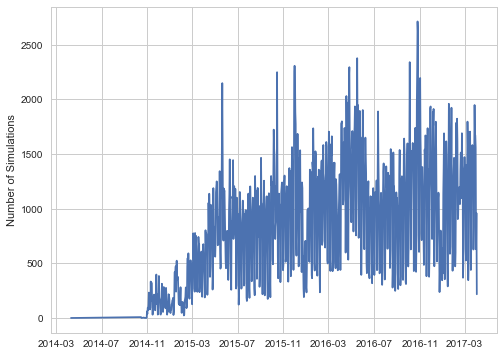

In [9]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)

date_count = df_clustered.groupby(df_clustered['Created'].dt.date)['User'].count()
ax.plot(date_count)
ax.set_ylabel('Number of Simulations')
plt.show()

In [10]:
sum(date_count)

794253

In [ ]:
# categorical vs categorical vs numeric
agg = df_users_clustered.groupby(['KM_Cluster', 'UserRole'])['NumSims'].mean()
print(agg)
agg = agg.unstack(level='UserRole')
print(agg)
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
agg.plot(kind='bar', ax=ax).set_ylabel('Average # Simulations')

In [ ]:
# Scatter plot by category
clusters = df_users_clustered['KM_Cluster'].unique()
for clust in clusters:
    plt.plot(df_users_clustered.loc[df_users_clustered.KM_Cluster==clust, 'NumChangedInputs'], 
             df_users_clustered.loc[df_users_clustered.KM_Cluster==clust, 'NumSims'], 
             linestyle='',
             marker='o',
             alpha=.7, label='Cluster={}'.format(clust))
plt.xlabel('Number of User Changed Inputs')
plt.ylabel('Number of Simulations')
plt.legend(numpoints=1);

In [ ]:
# Heat-map
agg = df_users_clustered.groupby(['KM_Cluster', 'UserRole'])['NumSims'].mean()
ax = sns.heatmap(agg.unstack(level='UserRole'), annot=True)
ax.set_title('Average number of simulations by cluster and user role')

In [ ]:
# Heat-map
agg = df_clustered.groupby(['KM_Cluster', 'UserRole'])['UserRole'].count()
ax = sns.heatmap(agg.unstack(level='UserRole'), annot=True)
ax.set_title('Average number of simulations by cluster and user role')

In [ ]:
df_usa = df_users_clustered[df_users_clustered['Country'] == 'US']
df_usa.head()

grp = df_usa.groupby('KM_Cluster')['NumSims'].mean()
grp.plot(kind='bar').set_ylabel('Number of Simulations');

In [ ]:
# categorical vs categorical vs numeric
agg = df_users_clustered.groupby(['KM_Cluster', 'OrganizationType'])['OrganizationType'].count()
print(agg)
agg = agg.unstack(level='OrganizationType')
print(agg)
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
agg.plot(kind='bar', ax=ax).set_ylabel('Number of Organizations (by type)')

In [ ]:
grp = df_users_clustered.groupby('KM_Cluster')['ImportedSolar'].mean()
grp.plot(kind='bar').set_ylabel('Average # of users importing solar');

In [ ]:
grp = df_users_clustered.groupby('KM_Cluster')['ImportedWind'].mean()
grp.plot(kind='bar').set_ylabel('Average # of users importing wind');

In [ ]:
df_users_clustered.info()

In [ ]:
grp = df_users_clustered.groupby('KM_Cluster')['GenCostMultiLines'].mean()
grp.plot(kind='bar').set_ylabel('Average # of users with multiple lines in generator cost table');

In [ ]:
grp = df_users_clustered.groupby('KM_Cluster')['WindCostMultiLines'].mean()
grp.plot(kind='bar').set_ylabel('Average # of users with multiple lines in wind cost table');

In [ ]:
grp = df_users_clustered.groupby('KM_Cluster')['BatCostMultiLines'].mean()
grp.plot(kind='bar').set_ylabel('Average # of users with multiple lines in battery cost table');

In [ ]:
grp = df_users_clustered.groupby('KM_Cluster')['PvCostMultiLines'].mean()
grp.plot(kind='bar').set_ylabel('Average # of users with multiple lines in PV cost table');

In [ ]:
grp = df_users_clustered.groupby('KM_Cluster')['ConCostMultiLines'].mean()
grp.plot(kind='bar').set_ylabel('Average # of users with multiple lines in converter cost table');

In [ ]:
grp = df_users_clustered.groupby('KM_Cluster')['ElectricNotDefault'].mean()
grp.plot(kind='bar').set_ylabel('Average # of users not using default electric peak');

In [ ]:
grp = df_users_clustered.groupby('KM_Cluster')['GeneratorNotDefault'].mean()
grp.plot(kind='bar').set_ylabel('Average # of users not using default generator');

In [ ]:
grp = df_users_clustered.groupby('KM_Cluster')['GenCapCost'].mean()
grp.plot(kind='bar').set_ylabel('Average # of users providing generator capital cost');

In [ ]:
grp = df_users_clustered.groupby('KM_Cluster')['BatCapCost'].mean()
grp.plot(kind='bar').set_ylabel('Average # of users providing battery capital cost');

In [ ]:
grp = df_users_clustered.groupby('KM_Cluster')['WindCapCost'].mean()
grp.plot(kind='bar').set_ylabel('Average # of users providing turbine capital cost');

In [ ]:
grp = df_users_clustered.groupby('KM_Cluster')['PvCapCost'].mean()
grp.plot(kind='bar').set_ylabel('Average # of users providing PV capital cost');

In [ ]:
# np.round(cluster3[['NumSims', 'DaysSinceFirst']].describe(), 2).T[['count','mean', 'std', 'min', 'max']]

In [ ]:
sns.stripplot(x='KM_Cluster', y='NumSims', data=df_users_clustered, jitter=True);

In [ ]:
sns.barplot(x='UserRole', y='NumChangedInputs', hue='KM_Cluster', data=df_users_clustered);

In [ ]:
sns.swarmplot(x='KM_Cluster', y='NumSims', data=df_users_clustered);

In [ ]:
sns.boxplot(x='KM_Cluster', y='NumSims', hue='UserRole', data=df_users_clustered);

In [ ]:
sns.countplot(x='KM_Cluster', hue='UserRole', data=df_users_clustered, palette="Greens_d");

In [ ]:
df_users_clustered['NumSims'].describe()

In [ ]:
sns.pointplot(x='KM_Cluster', y='NumSims', hue='UserRole', data=df_users_clustered_clean);

In [ ]:
f, ax = plt.subplots(figsize=(7, 3))
sns.countplot(y='KM_Cluster', data=df_users_clustered, color="c");

In [ ]:
print('Cluster 1')
print(C1_s.MultiGenSearch.value_counts(dropna=False))
print('\n')
print('Cluster 2')
print(C2_s.MultiGenSearch.value_counts(dropna=False))
print('\n')
print('Cluster 3')
print(C3_s.MultiGenSearch.value_counts(dropna=False))
print('\n')
print('Cluster 4')
print(C4_s.MultiGenSearch.value_counts(dropna=False))
print('\n')

In [ ]:
grps = C1_s.MultiGenSearch.value_counts(dropna=False)
pct = [x / float(sum(grps)) for x in grps]

s1 = pd.Series(grps.values, index=grps.index, name='count')
s2 = pd.Series(pct, index=grps.index, name='%total')
s2 = s2.apply(lambda x: round(x*100, 2))
df_grp = pd.concat([s1, s2], axis=1)
df_grp

In [ ]:
def by_cluster(col):
    frames = []
    clusters = [C1_s, C2_s, C3_s, C4_s]
    for idx, cluster in enumerate(clusters):
        grps = cluster[col].value_counts(dropna=False)
        pct = [x / float(sum(grps)) for x in grps]

        s1 = pd.Series(grps.values, index=grps.index, name='Count')
        s2 = pd.Series(pct, index=grps.index, name='Total%')
        s2 = s2.apply(lambda x: round(x*100, 2))
        
        df_grp = pd.concat([s1, s2], axis=1)
        df_grp =df_grp.reindex(['True', 'False', 'NA'])
        frames.append(df_grp)
        
    df_combo = pd.concat(frames, axis=1)
    vals = df_combo.values

    l1 = ['Cluster 1', 'Cluster 1', 'Cluster 2', 'Cluster 2', 'Cluster 3', 'Cluster 3', 'Cluster 4', 'Cluster 4']
    l2 = ['Count', 'Total%', 'Count', 'Total%', 'Count', 'Total%', 'Count', 'Total%']

    tuples = list(zip(l1, l2))
    index = pd.MultiIndex.from_tuples(tuples, names=[col, ''])

    dff = pd.DataFrame(vals, index=['True', 'False', 'NA'], columns=index)
    return dff

dff = by_cluster('MultiBatSearch')
dff

In [ ]:
df_grp.sort_index(ascending=False)
df_grp.reindex(['NA', 'False', 'True'])

In [ ]:
def user_counts(df):
    grps = df.UserRole.value_counts(dropna=False)
    pct = [x / float(sum(grps)) for x in grps]
    s1 = pd.Series(grps.values, index=grps.index, name='Count')
    s2 = pd.Series(pct, index=grps.index, name='Total%')
    s2 = s2.apply(lambda x: round(x*100, 2))
    df_grp = pd.concat([s1, s2], axis=1)
    return df_grp

print(user_counts(C2_s))

In [ ]:
def org_counts(df):
    grps = df.OrganizationType.value_counts(dropna=False)
    pct = [x / float(sum(grps)) for x in grps]

    s1 = pd.Series(grps.values, index=grps.index, name='Count')
    s2 = pd.Series(pct, index=grps.index, name='Total%')
    s2 = s2.apply(lambda x: round(x*100, 2))
    df_grp = pd.concat([s1, s2], axis=1)
    return df_grp

print(org_counts(C2_s))

In [ ]:
df_clustered.describe().loc[['mean', 'std']]

In [ ]:
df_clustered.Cluster.value_counts(dropna=False)

In [ ]:
C1 = df_clustered[df_clustered['Cluster'] == 1]
C2 = df_clustered[df_clustered['Cluster'] == 2]
C3 = df_clustered[df_clustered['Cluster'] == 3]
C4 = df_clustered[df_clustered['Cluster'] == 4]

In [12]:
pt = pd.pivot_table(df_clustered, values=['Created'], index=['User'], columns=['Cluster'], aggfunc='count', fill_value=0)

In [13]:
cluster_df = pd.DataFrame(pt.iloc[:, 0].index)
cluster_df['Cluster 1'] = pt.iloc[:, 0].values
cluster_df['Cluster 2'] = pt.iloc[:, 1].values
cluster_df['Cluster 3'] = pt.iloc[:, 2].values
cluster_df['Cluster 4'] = pt.iloc[:, 3].values
cluster_df['Cluster 1'].max()

3831

In [14]:
output = round(cluster_df.describe(), 2)
output

,Cluster 1,Cluster 2,Cluster 3,Cluster 4
count,18769.00,18769.00,18769.00,18769.00
mean,14.61,5.42,11.23,11.06
std,73.40,35.28,65.24,50.44
min,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.00
50%,1.00,0.00,0.00,0.00
75%,7.00,1.00,3.00,4.00
max,3831.00,1512.00,3621.00,2276.00
